<a href="https://colab.research.google.com/github/jgeake/Suncor_Predictor/blob/main/suncor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("suncor4.csv")
df.head()

Saving suncor4.csv to suncor4.csv


,Price,Vol.,Change,Weekly Av,5-Day Moving Av,High,Low,4-Week,7-Day_High,7-Day_Low,...,Target_5-Day Moving Av,Target_High,Target_Low,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Error 2-4,Unnamed: 30
0,41.13,4.20,0.73,NaN,40.846,41.36,40.85,39.0106,41.36,40.15,...,41.056,41.54,40.92,NaN,NaN,NaN,NaN,NaN,6dim,[-2.9622723 29.38233596 93.28573846 -2.8565984...
1,40.83,3.00,-0.37,NaN,40.708,41.12,40.54,38.9118,41.12,39.88,...,40.846,41.36,40.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.98,3.16,0.42,NaN,40.462,40.98,40.27,38.8246,41.01,38.72,...,40.708,41.12,40.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.81,3.85,0.82,NaN,39.888,41.01,40.46,38.7502,41.01,37.90,...,40.462,40.98,40.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.48,4.97,0.10,39.492,39.492,40.82,40.15,38.6957,40.82,37.90,...,39.888,41.01,40.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#would like it to output predictions for each column: change%, 5-day avg, volume, price
#although some of these fields could also be calculated from one- price
#could try it for redundancy, and see how well each works? not sure
# if they'll give the same or not, though maybe they should.

In [ ]:
import tensorflow as tf
BATCH_SIZE = 16
#5-Day  Moving Av HAS TWO SPACES IN IT CURRENTLY

X = df[['Price', 'Vol.', 'Change', '5-Day Moving Av', 'High', 'Low', '4-Week', '7-Day_High', '7-Day_Low', '5-Day Change', '5-Day Av Change']]
Y = df[['Target', 'Target_Vol.', 'Target_Change','Target_5-Day Moving Av', 'Target_High', 'Target_Low']]


X_data, y_data = X, Y
print(X_data)
print(y_data)
#data set splitting
import sklearn
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

#BATCH_SIZE = 16
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.repeat()
train_ds = train_ds.shuffle(buffer_size=len(X_train))
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.repeat()
test_ds = test_ds.shuffle(buffer_size=len(X_test))
test_ds = test_ds.batch(BATCH_SIZE)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

#REVIEW DATA BELOW AND MAKE SURE NONE OF ROWS READ NAN

     Price   Vol.  Change  5-Day Moving Av   High    Low     4-Week  \
0    41.13   4.20    0.73        40.846000  41.36  40.85  39.010600   
1    40.83   3.00   -0.37        40.708000  41.12  40.54  38.911800   
2    40.98   3.16    0.42        40.462000  40.98  40.27  38.824600   
3    40.81   3.85    0.82        39.888000  41.01  40.46  38.750200   
4    40.48   4.97    0.10        39.492000  40.82  40.15  38.695700   
..     ...    ...     ...              ...    ...    ...        ...   
245  32.98   7.20   -0.03        32.802000  33.74  32.89  32.667067   
246  32.99  11.87    0.03        32.750000  33.54  32.53  32.633333   
247  32.98   8.79    0.61        32.690000  33.17  32.70  32.594444   
248  32.78   5.97    1.55        32.593333  32.95  32.26  32.546667   
249  32.28   6.93   -1.34        32.500000  32.83  32.08  32.500000   

     7-Day_High  7-Day_Low  5-Day Change  5-Day Av Change  
0         41.36      40.15      0.015804         0.340000  
1         41.12      39.88 

In [ ]:
mymodel = Sequential() # dense net model

# input and Hidden layer-1
mymodel.add(Dense(units=4, input_dim=11, kernel_initializer='normal', activation='relu'))
# Hidden layer-2
mymodel.add(Dense(48, activation='linear'))
mymodel.add(Dense(48, activation='relu'))
mymodel.add(Dense(56, activation='linear'))
mymodel.add(Dropout(0.2))
mymodel.add(Dense(24, activation='linear'))
mymodel.add(Dropout(0.5))

# output layer
mymodel.add(Dense(units=6, kernel_initializer='normal'))
print(mymodel.summary())

mymodel.compile(loss='mean_squared_error', optimizer='adam') # train model
batch_size=32

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 4)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 48)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 48)                  │           2,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 56)                  │           2,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 24)                  │           1,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,902 (26.96 KB)

 Trainable params: 6,902 (26.96 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 881.5052 - val_loss: 800.3049
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 830.5895 - val_loss: 726.9255
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 693.2482 - val_loss: 569.9733
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 484.2521 - val_loss: 246.2379
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 234.9034 - val_loss: 21.0414
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.2126 - val_loss: 19.9483
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.5024 - val_loss: 10.0850
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.1681 - val_loss: 45.8085
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 115.3822 - val_loss: 26.3864
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 105.1762 - val_loss: 4.4468
Validation loss improved from inf to 4.4468
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.6935 - val_loss: 4.1816
Valida

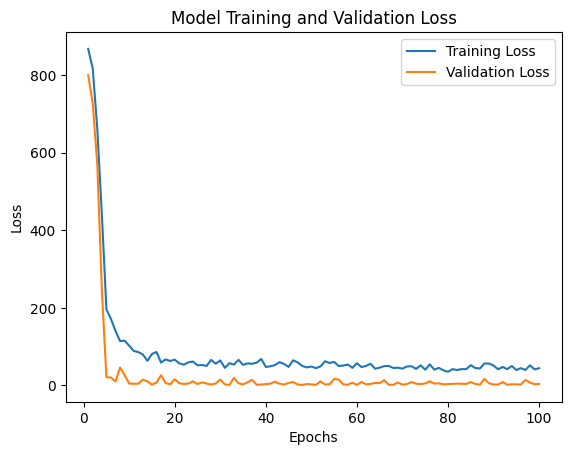

In [ ]:
import matplotlib.pyplot as plt

best_weights = None  # Variable to store the best weights
best_val_loss = float('inf')  # Initialize to a very large value (infinity)
threshold_val_loss = 7  # Set your desired threshold

epochs = 100  # Number of epochs
batch_size = 32  # Specify your batch size

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Custom training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Train the model for one epoch
    history = mymodel.fit(train_ds, steps_per_epoch=len(X_train)//batch_size,
                          validation_data=test_ds, validation_steps=len(y_test)//batch_size, epochs=1)

    # Get the training and validation loss for this epoch
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]

    # Append the loss values to the lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Check if the validation loss is below the threshold and has improved
    if val_loss < best_val_loss and val_loss < threshold_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}")
        best_val_loss = val_loss
        best_weights = mymodel.get_weights()  # Save the best weights in memory

# After training, restore the best weights
if best_weights is not None:
    mymodel.set_weights(best_weights)  # Restore the best weights to the model
    print("Restored best weights")

# Plotting the training and validation loss
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
user_input = input("Enter nine input values separated by spaces: ")
input_array = np.array([float(x) for x in user_input.split()]).reshape(1, -1)

# Assuming your model is named `mymodel`
prediction = mymodel.predict(input_array).flatten()  # Flatten to 1D array if necessary
print("Prediction:", prediction)
#Price	Vol.	Change	5-Day Moving Av	High	Low	4-Week	7-Day_High	7-Day_Low	5-Day Change	5-Day Av Change


Enter nine input values separated by spaces: 39.21	3.09	2		38.236	39.31	38.15	38.903	39.31	37.33	0.036725325	0.586
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: [38.98816    4.660519   0.2772065 38.812027  39.05615   38.383453 ]


In [ ]:
actual_values = input("Enter six values separated by spaces: ")
actual_array = np.array([float(x) for x in actual_values.split()]).reshape(1, -1)
differences = np.zeros(len(actual_array[0]))
# Step 2: Calculate and print percent differences
print("Percent differences (%):")
for i in range(len(actual_array[0])): #Added a 0 to index the actual values list.
    actual = actual_array[0][i] #Added a 0 to index the actual values list.
    predicted = prediction[i]  # Ensure this matches your prediction array

    percent_diff = ((actual - predicted) / actual) * 100
    print(f'{percent_diff:5.2f}', end=" ") #Changed to format as a float with 2 decimal places.
    differences[i] = actual - predicted  # Store differences in a list

# Print with a newline and formatted array
print("\nDifferences")
print(f"{', '.join([f'{diff:5.2f}' for diff in differences])}")

if (prediction[0] < input_array[0][0] and actual_array[0][0] < input_array[0][0]):
  print("it predicted the drop correctly")
else:
  if (prediction[0] > input_array[0][0] and actual_array[0][0] > input_array[0][0]):
    print("it predicted the rise correctly")
  else:
    print("it predicted incorrectly")

#negative percentage -> prediction was higher
#positive percentage -> prediction was lower

Enter six values separated by spaces: 39.6	2.34	0.99		38.602	39.84	39.03
Percent differences (%):
 1.55 -99.17 72.00 -0.54  1.97  1.66 
Differences
 0.61, -2.32,  0.71, -0.21,  0.78,  0.65
it predicted incorrectly


In [ ]:
#extracting the predicted price from the 5-day average
av = prediction[3]
guess = av*5 - 4*av*(1+av-input_array[0][3])
print(guess)

85.36480660772378


In [ ]:
model_path = "mymodel.keras"
mymodel.save(model_path)

# Download the model to your computer
files.download(model_path)
mymodel.save("mymodel.keras", save_format="keras")
files.download("mymodel.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>